In [1]:
import numpy as num
import pandas as pd
import pprint
import math
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import sys

# Robot 1

In [2]:
# data= pd.read_csv('RobotDataset/Robot1', sep=" ", header=None)
# data=data.drop(columns=0)
# data.columns = ["class","a1","a2","a3","a4","a5","a6","Id"]
# train_data=data.sample(frac=0.8,random_state=200)
# validation_data=data.drop(train_data.index)
# # # for testing 
# # validation_data=pd.read_csv(sys.args[1],sep=" ", header=None)
# # validation_data=validation_data.drop(columns=0)
# # validation_data.columns=["class","a1","a2","a3","a4","a5","a6","Id"]

# max_value_k= int(math.ceil(math.sqrt(len(train_data.index))))
# list_attributes=["a1","a2","a3","a4","a5","a6"]

In [3]:
def check_value(validation_data ,list_attributes,train_data,k_value,type_cal):
    dict_value={}
    list_value=[]
    validation_prediction=[]
    for validate_index, validate_row in validation_data.iterrows():
        dict_value={}
        dict_result={}
        for train_index, train_row in train_data.iterrows():
            if type_cal==0:
#                 euclidean
                sum_value=0.0
                for attr in list_attributes:
                    sum_value=sum_value + ((validate_row[attr]-train_row[attr])**2)
                sum_value=(sum_value**0.5)
            elif type_cal==1:
#                 Manhatan
                sum_value=0.0
                for attr in list_attributes:
                    sum_value=sum_value + abs(validate_row[attr]-train_row[attr])
                
            elif type_cal==2:
#                 Minkowski
                sum_value=0.0
                for attr in list_attributes:
                    sum_value=sum_value + (abs(validate_row[attr]-train_row[attr])**1.5)
                sum_value=math.pow(sum_value,1/1.5)
            elif type_cal==3:
#                 cosine 
                sum_value=0.0
                x_y=0.0
                x_2=0.0
                y_2=0.0
                for attr in list_attributes:
                    x_y = x_y + (validate_row[attr]*train_row[attr])
                    x_2 = x_2 + (train_row[attr]**2)
                    y_2 = y_2 + (validate_row[attr]**2)
                    
                x_2=(x_2**0.5)
                y_2=(y_2**0.5)
                sum_value=1-(x_y/(x_2*y_2))
            dict_value.setdefault(sum_value,[])
            dict_value[sum_value].append(train_index)
            dict_result.setdefault(sum_value,[])
            dict_result[sum_value].append(train_row['class'])
#         print dict_value
#         print dict_result
        current_k=0
        res={}
#         print(train_data['class'].unique())
        for key in train_data['class'].unique():
            res[key]=0
        l=dict_result.keys()
        l.sort()
        for key in l:
            if current_k<k_value:
                for i in dict_result[key]:
                    if current_k<k_value:
                        for j in res.keys():
                            if j==i:
                                res[j]=res[j]+1
                                current_k=current_k+1
                    else:
                        break
            else :
                break
        max_v=0
        predication=0
#         print(res.keys())
        for key in res.keys():
            if res[key]>max_v:
                predication=key
                max_v=res[key]
    
        validation_prediction.append(predication)
    return validation_prediction        

In [4]:
def calc_preformance(target_value,pridected_value):
    t_p=0
    f_p=0
    t_n=0
    f_n=0
    for i in range(len(target_value)):
        if target_value[i]==0 and target_value[i]==pridected_value[i]:
            t_n=t_n+1
        elif target_value[i]==1 and target_value[i]==pridected_value[i]:
            t_p=t_p+1
        elif pridected_value[i]==1 and target_value[i]==0:
            f_p=f_p+1
        elif pridected_value[i]==0 and target_value[i]==1:
            f_n=f_n+1
    if t_p!=0:
        accuracy=(t_n+t_p)/float(t_n+t_p+f_p+f_n)

        precision=(t_p)/float(t_p+f_p)
        recall=(t_p)/float(t_p+f_n)
        a=1/precision
        b=1/recall
        f1_score=2/(a+b)
    else :
        accuracy=0
        precision=0
        recall=0
        f1_score=0
#     print "ture positive",t_p
#     print "false positive",f_p
#     print "false negative",f_n
#     print "ture negative",t_n
    
    print "Accuracy ",accuracy
    print "Precision ",precision
    print "Recall ",recall
    print "F1 Score",f1_score
    return accuracy


In [5]:
# # print train_data.iloc[117]
# print "Robot 1"
# ac_list_robot=[]
# actual_value=validation_data['class'].tolist()
# dict_ac={0:[],1:[],2:[],3:[]}
# for i in range(1,max_value_k+1,2):
#     print "k-value ="+str(i)
#     for j in range(4):
#         if j == 0:
#             print "Euclidean Measure"
#         elif j==1:
#             print "Manhantan Measure"
#         elif j==2:
#             print "Minkowski Measure"
#         elif j==3:
#             print "Cosine Measure"
#         prediction=check_value(validation_data,list_attributes,train_data,i,j)
# #     print prediction
#         ac=calc_preformance(actual_value,prediction)
#         dict_ac[j].append(ac)
# #             ac_list_robot.append(ac)

In [6]:
# import matplotlib.pyplot as plt
# list_k_value=range(1,max_value_k+1,2)
# for i in range(4):
#     plt.plot(list_k_value,dict_ac[i])
#     plt.title('k-value vs accuracy')
#     plt.xlabel('k-value')
#     plt.ylabel('accuracy')
#     plt.show()


In [7]:
# X = data.iloc[:, :-1].values  
# y = data.iloc[:, 4].values
# from sklearn.model_selection import train_test_split
# X_train=train_data.iloc[:,:-1].values
# X_test=validation_data.iloc[:,:-1].values
# y_train =train_data.iloc[:,4].values
# y_test=validation_data.iloc[:,4].values
# from sklearn.neighbors import KNeighborsClassifier  
# for i in range(1,max_value_k+1,2):
#     classifier = KNeighborsClassifier(n_neighbors=i)  
#     classifier.fit(X_train, y_train)
#     y_pred = classifier.predict(X_test)
#     from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# #     print(confusion_matrix(y_test, y_pred))  
# # print(classification_report(y_test, y_pred)) 
#     print(accuracy_score(y_test, y_pred))


# Robot 2

In [8]:
print "Robot 2"
data_robot= pd.read_csv('RobotDataset/Robot2', sep=" ", header=None)
data_robot=data_robot.drop(columns=0)
dict_robot2_ac={0:[],1:[],2:[],3:[]}
data_robot.columns = ["class","a1","a2","a3","a4","a5","a6","Id"]
train_data_robot=data_robot.sample(frac=0.8,random_state=200)
validation_data_robot=data_robot.drop(train_data_robot.index)
# from sklearn.model_selection import train_test_split  
# train_data_robot, validation_data_robot= train_test_split(data_robot, test_size=0.2)
# validation_data_robot=pd.read_csv(sys.args[1],sep=" ", header=None)
# validation_data_robot=validation_data_robot.drop(columns=0)
# validation_data_robot.columns=["class","a1","a2","a3","a4","a5","a6","Id"]

max_value_k= int(math.ceil(math.sqrt(len(train_data_robot.index))))
list_attributes_robot=["a1","a2","a3","a4","a5","a6"]
actual_value_robot=validation_data_robot['class'].tolist()
ac_list_robot2=[]
for i in range(1,max_value_k+1,2):
    print "k-value ="+str(i)
    for j in range(4):
        if j == 0:
            print "Euclidean Measure"
        elif j==1:
            print "Manhantan Measure"
        elif j==2:
            print "Minkowski Measure"
        elif j==3:
            print "Cosine Measure"
#     print i
        prediction=check_value(validation_data_robot,list_attributes_robot,train_data_robot,i,j)
#     print prediction
        ac=calc_preformance(actual_value_robot,prediction)
        dict_robot2_ac[j].append(ac)
#       if j==0:
#             ac_list_robot2.append(ac)

Robot 2
k-value =1
Euclidean Measure
Accuracy  0.958333333333
Precision  1.0
Recall  0.909090909091
F1 Score 0.952380952381
Manhantan Measure
Accuracy  0.958333333333
Precision  1.0
Recall  0.909090909091
F1 Score 0.952380952381
Minkowski Measure
Accuracy  0.958333333333
Precision  1.0
Recall  0.909090909091
F1 Score 0.952380952381
Cosine Measure
Accuracy  0.833333333333
Precision  0.888888888889
Recall  0.727272727273
F1 Score 0.8
k-value =3
Euclidean Measure
Accuracy  1.0
Precision  1.0
Recall  1.0
F1 Score 1.0
Manhantan Measure
Accuracy  1.0
Precision  1.0
Recall  1.0
F1 Score 1.0
Minkowski Measure
Accuracy  1.0
Precision  1.0
Recall  1.0
F1 Score 1.0
Cosine Measure
Accuracy  0.833333333333
Precision  1.0
Recall  0.636363636364
F1 Score 0.777777777778
k-value =5
Euclidean Measure
Accuracy  0.958333333333
Precision  1.0
Recall  0.909090909091
F1 Score 0.952380952381
Manhantan Measure
Accuracy  0.958333333333
Precision  1.0
Recall  0.909090909091
F1 Score 0.952380952381
Minkowski Meas

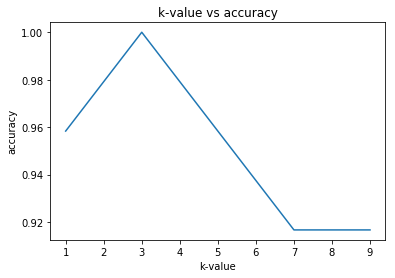

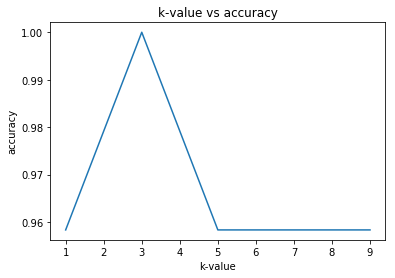

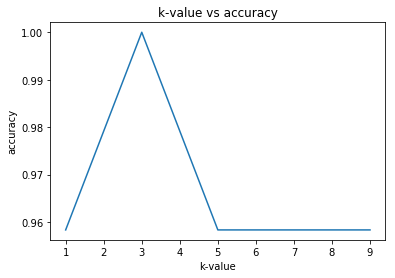

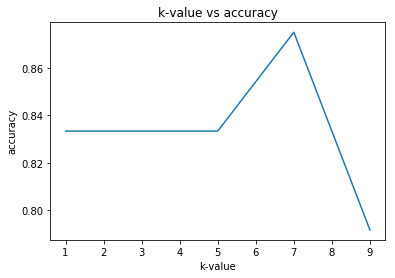

In [15]:
import matplotlib.pyplot as plt
list_k_value=range(1,max_value_k+1,2)
for i in range(4):
    plt.plot(list_k_value,dict_robot2_ac[i])
    plt.title('k-value vs accuracy')
    plt.xlabel('k-value')
    plt.ylabel('accuracy')
    plt.show()


In [10]:
from sklearn.model_selection import train_test_split
X_train=train_data_robot.iloc[:,:-1].values
X_test=validation_data_robot.iloc[:,:-1].values
y_train =train_data_robot.iloc[:,4].values
y_test=validation_data_robot.iloc[:,4].values
from sklearn.neighbors import KNeighborsClassifier  
for i in range(1,max_value_k+1,2):
    classifier = KNeighborsClassifier(n_neighbors=i)  
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#     print(confusion_matrix(y_test, y_pred))  
# print(classification_report(y_test, y_pred)) 
    print "k-value="+str(i)
    print(accuracy_score(y_test, y_pred))

k-value=1
1.0
k-value=3
0.8333333333333334
k-value=5
0.8333333333333334
k-value=7
0.7916666666666666
k-value=9
0.75


# Iris

In [11]:
# def calc_preformance_iris(target_value,pridected_value):
#     accuracy_list=[]
#     precision_list=[]
#     recall_list=[]
#     f1_score_list=[]
#     li =['Iris-setosa','Iris-virginica','Iris-versicolor' ]
# #     key='Iris-setosa'
#     for key in li:
#         t_p=0
#         f_p=0
#         t_n=0
#         f_n=0
#         for i in range(len(target_value)): 
#             if target_value[i]==key and target_value[i]==pridected_value[i]:
#                 t_p=t_p+1
#             elif  target_value[i]!=key and target_value[i]==pridected_value[i]:
#                 t_n=t_n+1
#             elif pridected_value[i]==key and  target_value[i]!=key:
#                 f_p=f_p+1
#             elif pridected_value[i]!=key and target_value[i]==key:
#                 f_n=f_n+1
# #             else:
# #                 print "se"
#         if t_p!=0:
#             accuracy=(t_n+t_p)/float(t_n+t_p+f_p+f_n)

#             precision=(t_p)/float(t_p+f_p)
#             recall=(t_p)/float(t_p+f_n)
#             a=1/precision
#             b=1/recall
#             f1_score=2/(a+b)
#         else :
#             accuracy=0
#             precision=0
#             recall=0
#             f1_score=0
#         accuracy_list.append(accuracy)
#         precision_list.append(precision)
#         recall_list.append(recall)
#         f1_score_list.append(f1_score)
#     print "Accuracy ",sum(accuracy_list)/float(len(li))
# #     print "Precision ",sum(precision_list)/float(len(li))
# #     print "Recall ",sum(recall_list)/len(li)
# #     print "F1 Score",sum(f1_score_list)/len(li)
#     return sum(accuracy_list)/float(len(li))


In [12]:
# print "Iris"
# dict_iris_ac={0:[],1:[],2:[],3:[]}
# data_iris= pd.read_csv('Iris/Iris.csv')
# data_iris.columns = ["a1","a2","a3","a4","class"]
# train_data_iris=data_iris.sample(frac=0.8)
# validation_data_iris=data_iris.drop(train_data.index)
# # from sklearn.model_selection import train_test_split  
# # train_data_iris, validation_data_iris= train_test_split(data_iris, test_size=0.2)
# validation_data_iris=pd.read_csv(sys.args[1],sep=" ", header=None)
# # validation_data_iris=validation_data_iris.drop(columns=0)
# validation_data_iris.columns=["a1","a2","a3","a4","class"]

# max_value_k_iris= int(math.ceil(math.sqrt(len(train_data_iris.index))))
# list_attributes_iris=["a1","a2","a3","a4"]
# actual_value_iris=validation_data_iris['class'].tolist()
# ac_list_iris=[]
# for i in range(1,max_value_k_iris+1,2):
#     print "k-value = "+str(i)
#     for j in range(4):
#         if j == 0:
#             print "Euclidean Measure"
#         elif j==1:
#             print "Manhantan Measure"
#         elif j==2:
#             print "Minkowski Measure"
#         elif j==3:
#             print "Cosine Measure"
# #     print i
#         prediction_iris=check_value(validation_data_iris,list_attributes_iris,train_data_iris,i,j)
    
# #     print prediction_iris
# #     print actual_value_iris
#         target_names = ['Iris-setosa','Iris-virginica','Iris-versicolor' ]
#         print(classification_report(actual_value_iris, prediction_iris, target_names=target_names))
#         ac= accuracy_score(actual_value_iris,prediction_iris)
#         print "Accuracy "+str(ac)
# #         if j==0:
# #             ac_list_iris.append(ac)
#         dict_iris_ac[j].append(ac)


In [13]:
# import matplotlib.pyplot as plt
# list_k_value=range(1,max_value_k_iris+1,2)
# for i in range(4):

#     plt.plot(list_k_value,dict_iris_ac[i])

#     plt.title('k-value vs accuracy for iris')
#     plt.xlabel('k-value')
#     plt.ylabel('accuracy')
#     plt.show()


In [14]:
# from sklearn.model_selection import train_test_split
# X_train=train_data_iris.iloc[:,:-1].values
# X_test=validation_data_iris.iloc[:,:-1].values
# y_train =train_data_iris.iloc[:,4].values
# y_test=validation_data_iris.iloc[:,4].values
# from sklearn.neighbors import KNeighborsClassifier  
# for i in range(1,max_value_k_iris+1,2):
#     classifier = KNeighborsClassifier(n_neighbors=i)  
#     classifier.fit(X_train, y_train)
#     y_pred = classifier.predict(X_test)
#     from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# #     print(confusion_matrix(y_test, y_pred))  
# # print(classification_report(y_test, y_pred)) 
#     print "k-value = "+str(i)
#     print("Accuracy "+str(accuracy_score(y_test, y_pred)))